## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#importing necessery libraries for dataset analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Upload and read csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xl = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")

In [ ]:
#Examining first 5 rows of the dataset
xl.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking shape of our dataset
xl.shape

(48895, 16)

In [ ]:
#checking the number of rows in given dataset
len(xl)

48895

In [ ]:
#Listing the names of all the column labels in the dataset
list(xl.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#Checking the non null values and data type in each column of dataset
xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Descriptive statistics summary of data in the dataframe
xl.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Categorical features in the dataset
str_columns = xl.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: \n{list(str_columns)}')

 The following are the categorical features in the dataset: 
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
#Non categorical features in the dataset
number_columns = xl.select_dtypes(exclude = 'object').columns
print(f' The following are the non categorical features in the dataset: \n{list(number_columns)}') 


 The following are the non categorical features in the dataset: 
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
#Checking the null values in the dataset
print(f"The missing values in the data are:\n {xl.isnull().sum()}")

The missing values in the data are:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Filling missing values
xl['name'].fillna('NA', inplace = True)
xl['host_name'].fillna('NA', inplace =  True)
xl['reviews_per_month'].fillna(0, inplace = True)
xl['last_review'].fillna(0, inplace = True)


In [ ]:
#Checking null values again
xl.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#Dropping the column named last_review as it isn't useful for our analysis
xll = xl.drop(['last_review'], axis =1)
xll.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
print(f'The number of missing values after cleaning the data are: \n{xll.isna().sum()}')

The number of missing values after cleaning the data are: 
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# 1. The host with the maximum number of listings throughout the year is?

In [ ]:
# Finding top 12 hosts with maximum number of listings
host_areas = xll.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(12)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
13220,Sonder,Manhattan,96
6540,Jeremy & Laura,Manhattan,96
2901,Corporate Housing,Manhattan,91


# Observation 1
# The host named Sonder (NYC) has most no. of listings.



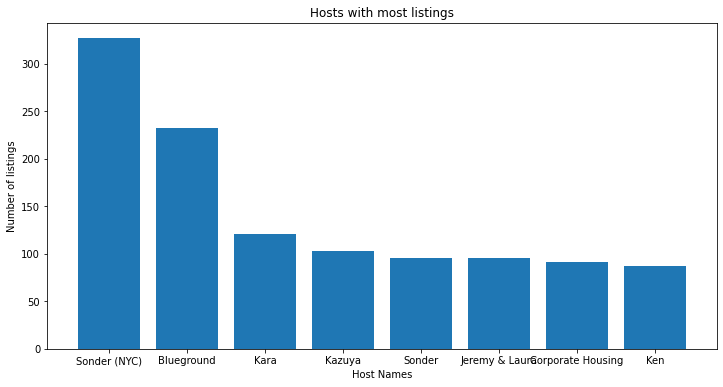

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings')
plt.xlabel('Host Names')
plt.ylabel('Number of listings')
plt.show()

# 2. Which neighbourhood group has the most number of reviews?

In [ ]:
area_reviews = xll.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
area_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


In [ ]:
arnew = area_reviews.set_index("neighbourhood_group")

Text(0, 0.5, 'no. of reviews')

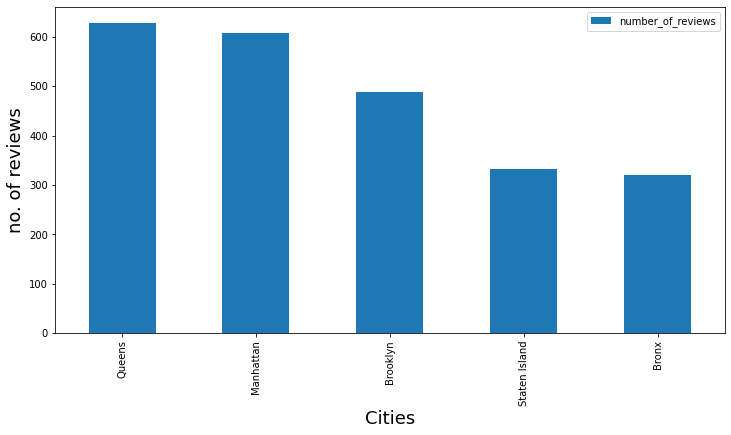

In [ ]:
arnew.plot(kind='bar')
plt.xlabel('Cities',fontsize=18)
plt.ylabel("no. of reviews",fontsize=18)

# Observation 2
# Queens has majority of reviews followed by Manhattan.

# 3. Which is the neighbourhood group with maximum frequency of listings?

In [ ]:
xll.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
freq_neighbourhood_group=xll.neighbourhood_group.value_counts()

In [ ]:
freq_neighbourhood_group_v = xll.neighbourhood_group.value_counts().keys()

In [ ]:
freq_neighbourhood_group_v

Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

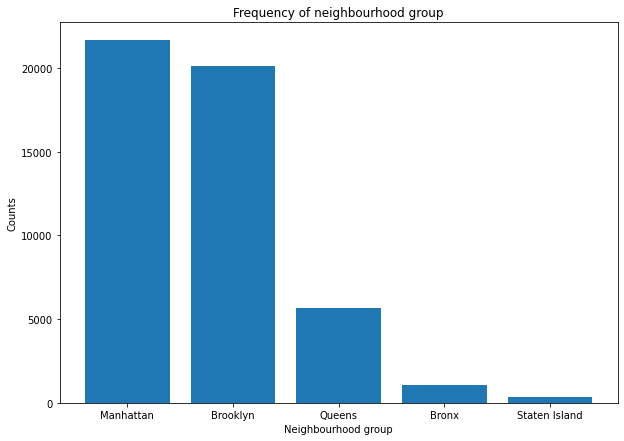

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(freq_neighbourhood_group_v,freq_neighbourhood_group)
plt.title("Frequency of neighbourhood group")
plt.xlabel("Neighbourhood group")
plt.ylabel("Counts")
plt.show()

# Observation 3

# The frequency of Manhattan is the maximum.

# Observation 4                                                                   
# *As we can see from Observation 2 that Manhattan has the second highest number of reviews. And, observation 3 states that the frequency of listings is maximum in the neighbourhood Manhattan followed by Brooklyn. So, it would be safe to say that Manhattan has the maximum number of busy hosts.*

In [ ]:
#Dropping id,latitude and longitude columns as we don't consider them necessary for our further analysis
xll.drop(["latitude","longitude",'id'],axis=1,inplace=True)
xll.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#Descriptive statistical summary of the data
xll.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#finding out more about our neighbourhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'
#Finding out the price statistics of all the neighbourhood groups

#Brooklyn
bnb_1=xll.loc[xll['neighbourhood_group'] == 'Brooklyn']
price_bnb1=bnb_1[['price']]
#Manhattan
bnb_2=xll.loc[xll['neighbourhood_group'] == 'Manhattan']
price_bnb2=bnb_2[['price']]
#Queens
bnb_3=xll.loc[xll['neighbourhood_group'] == 'Queens']
price_bnb3=bnb_3[['price']]
#Staten Island
bnb_4=xll.loc[xll['neighbourhood_group'] == 'Staten Island']
price_bnb4=bnb_4[['price']]
#Bronx
bnb_5=xll.loc[xll['neighbourhood_group'] == 'Bronx']
price_bnb5=bnb_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_bnb1, price_bnb2, price_bnb3, price_bnb4, price_bnb5]

In [ ]:
#We create an empty list that we will append later with price distribution for every neighbourhood group
a_a_b_n_2=[]
#creating list with known values in neighbourhood_group column
pan_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    a_a_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
a_a_b_n_2[0].rename(columns={'price':pan_list[0]}, inplace=True)
a_a_b_n_2[1].rename(columns={'price':pan_list[1]}, inplace=True)
a_a_b_n_2[2].rename(columns={'price':pan_list[2]}, inplace=True)
a_a_b_n_2[3].rename(columns={'price':pan_list[3]}, inplace=True)
a_a_b_n_2[4].rename(columns={'price':pan_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=a_a_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df
#descriptive statistical data of prices of listings in all neighbourhood groups

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


In [ ]:
xll.agg({'price':['count','max','min','mean','median']})

,price
count,48895.000000
max,10000.000000
min,0.000000
mean,152.720687
median,106.000000


# Observation 5                                                                    

# *Minimun Price is set as 0, which is impossible as there are no free rooms on Airbnb.*
# *Mean is much greater than the median, which indicates that the data is positively skewed. Positively skewed means that price of most of the listings is less than the average(mean) price.*

In [ ]:
# 10th and 90th quantile of price
plow = xll['price'].quantile(0.10)
phigh = xll['price'].quantile(0.9)
plow,phigh

(49.0, 269.0)

In [ ]:
#Dropping the minimum price 0
asd = xll.drop(xll[xll["price"]==0].index)
asd.agg({'price':['count','max','min','mean','median']})

,price
count,48884.000000
max,10000.000000
min,10.000000
mean,152.755053
median,106.000000


In [ ]:
asd["price"].quantile(0.9)

269.0

In [ ]:
#dropping the price greater than 90th quantile
asdn = asd.drop(asd[asd['price']>phigh].index)
asdnp = asdn["price"]
asdnp

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 44006, dtype: int64

In [ ]:
asdn.agg({'price':['count','max','min','mean','median']})

,price
count,44006.000000
max,269.000000
min,10.000000
mean,112.360042
median,100.000000


Text(0, 0.5, 'Price')

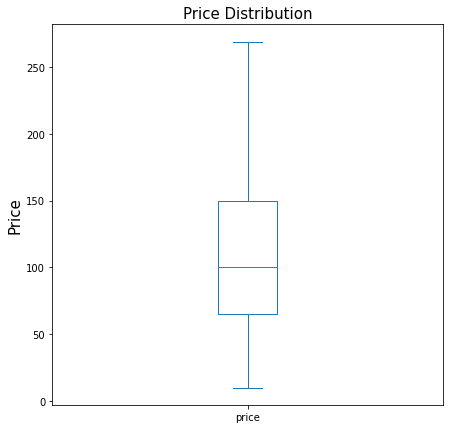

In [ ]:
plt.rcParams['figure.figsize'] = (7,7)
asdnp.plot(kind="box")
plt.title("Price Distribution",fontsize = 15)
plt.ylabel('Price',fontsize = 15)



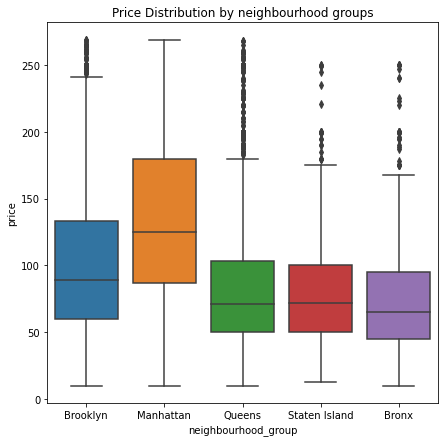

In [ ]:
ax = sns.boxplot(x="neighbourhood_group", y="price", data=asdn).set_title('Price Distribution by neighbourhood groups')
plt.show()

Observation 6


*The above Box Plot  displays the summary of the set of data values of all the neighbourhood groups where the vertical line which goes through the box is the median. Here x-axis denotes the neighbourhood groups while the y-axis shows the price distribution. With the statistical table and above box plot we can definitely observe a couple of things about price distribution for Airbnb. First, we can observe that Manhattan has the highest range of prices with average price \$150, followed by Brooklyn with an average price \$90 per night. Queens and Staten Island have similar distributions, Bronx is the cheapest of them all.* 








In [ ]:
#Types of rooms available
xll["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
common_room_type = xll.room_type.value_counts()
common_room_type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# Which type of room is the most available?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


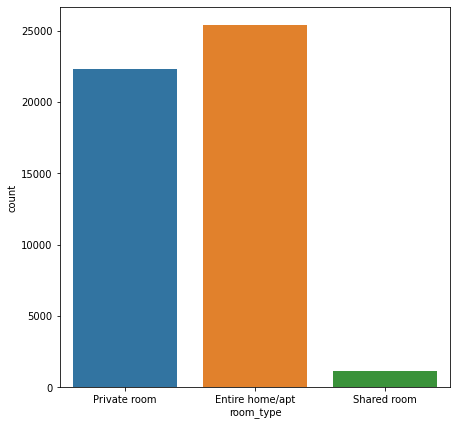

In [ ]:
#Most available room type
sns.countplot(xll.room_type)

# Observation 7

# The most available room type is entire home/apt room.


# Which is the most preferred room type in different neighbourhood groups?

In [ ]:
#Most Preferred Room type in different neighbourhood groups
abnba = xll.groupby(["neighbourhood_group","room_type"])['neighbourhood_group'].count().unstack()
abnba

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0.5, 1.0, 'Room type Preferrence bar chart')

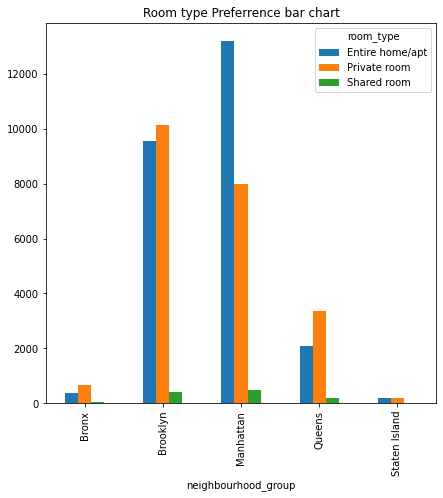

In [ ]:
abnba.plot(kind='bar')
plt.title("Room type Preferrence bar chart")



# Observation 8
# *  *The most preferred room type in Manhattan is entire home/apt.* 
# *  *The most preferred room type in Brooklyn is Private room.*

# *   *The most preferred room type in Bronx is Private room.*
# *   *The most preferred room type in Queens is Private room.*

# *   *The most preferred room type in Staten Island is Private room.*







# Which hosts are the busiest and why?

In [ ]:
#The hosts who have maximum number of reviews will be the busiest because that means people are booking frequently at those hosts.
busiest_hosts = xll.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
10310,Dona,47621202,Private room,Queens,629
17755,Jj,4734398,Private room,Manhattan,607
25626,Maya,37312959,Private room,Queens,543
6259,Carol,2369681,Private room,Manhattan,540
8973,Danielle,26432133,Private room,Queens,510
3966,Asa,12949460,Entire home/apt,Brooklyn,488
37848,Wanda,792159,Private room,Brooklyn,480
22556,Linda,2680820,Private room,Queens,474
8651,Dani,42273,Entire home/apt,Brooklyn,467
2953,Angela,23591164,Private room,Queens,466


<BarContainer object of 10 artists>

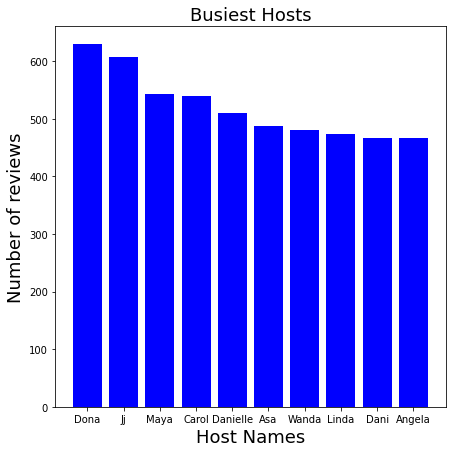

In [ ]:
#Busiest hosts

host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews,color='blue')

# Observation 9


# The busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.

# Top 10 busiest host are:
# Dona, JJ, Maya, carol, Danielle, Asa, Wanda, Linda, Dani and Angela.

# Relationship between room type and price of listings

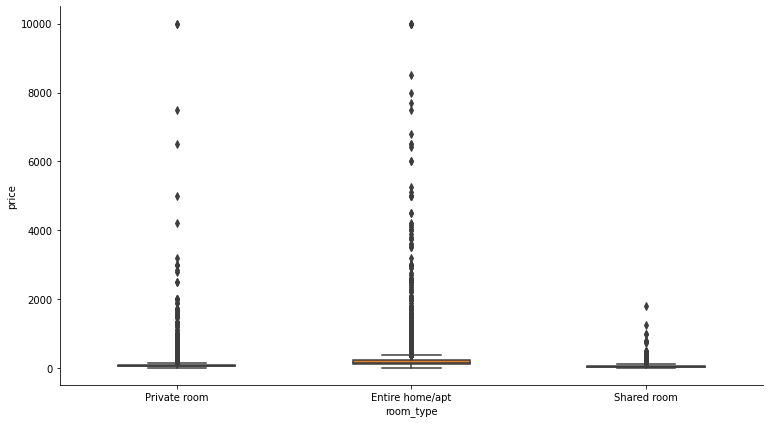

In [ ]:
sns.catplot(
    data=xll, 
    x='room_type', y='price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [ ]:
#The distribution is highly skewed. So, we take the logarithm of prices and then plot the graph.

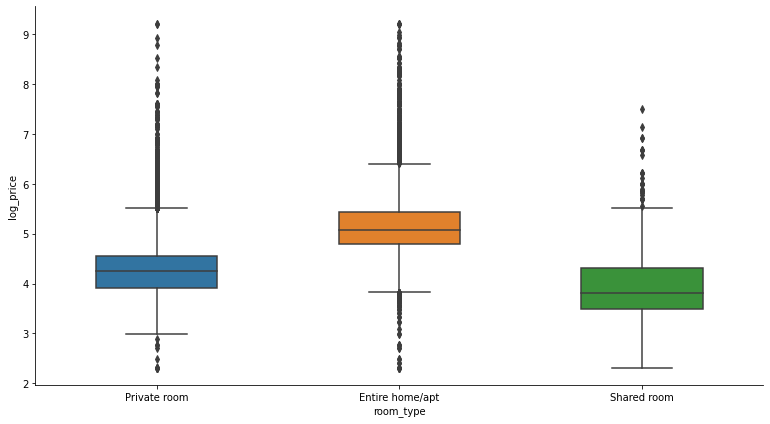

In [ ]:
xll = xll[xll.price!=0]
xll.loc[:,"log_price"] = np.log(xll.loc[:,"price"])
sns.catplot(data=xll, x="room_type", y="log_price", kind="box", height=6, aspect=1.8, width=0.5)

# Observation 10 

# Using the box plot, we checked how price changes according to the type of the room. Entire home/apt room type is costlier than private room and shared room type category.



# Relationship between neighbourhood groups and their availability for number of days.

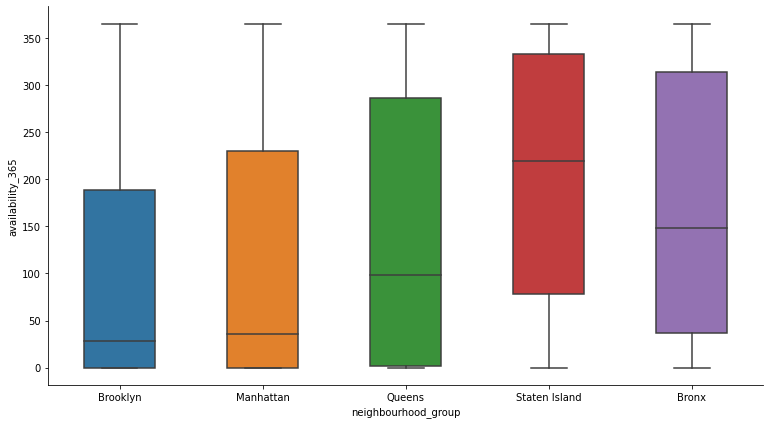

In [ ]:
sns.catplot(
    data=xll, 
    x='neighbourhood_group', y='availability_365', kind='box',
    height=6, aspect=1.8, width=0.5
)

# Observation 11

# It is clear from the above plot that Staten island is available for the maximum number of days of the year followed by Bronx.

# **Conclusion**



In the given Airbnb dataset, firstly we did data cleaning in order to make the data suitable for our data analysis. Then,we explored the Airbnb dataset focussing on different features of the dataset.We tried to find out the relationship between different features and how they impact the bookings in different areas.


> The data analysis would have been better if we had other features in the dataset like the amenities offered, the number of people that can be accommodated in the place, the time taken by the host to respond once a booking is done, reviews on the basis of stars scale like 5 star for the best.

> We have performed the exploratory data analysis on the given dataset and hope that the insights prove out to be helpful.





